<a id="top"></a>
## Kaggle Competition_Titanic -- Machine Learning from Disaster
1. [Introduction](#intro)
<br>
2. [Data](#data)
<br>
3. [Machine Learning](#ml)
<br>
4. [Save Model](#save)

<a id="intro"></a>
### 1. Introduction
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

[back to top](#top)

<a id="data"></a>
### 2. Data
In this competition, you’ll gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled `train.csv` and the other is titled `test.csv`.

`Train.csv` will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in `test.csv`) survived.

In [1]:
import pandas as pd
data = pd.read_csv("train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
test = pd.read_csv("test.csv")
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


<a id="variables"></a>
##### 2. 1 Variables
* pclass: A proxy for socio-economic status (SES)
  * 1st = Upper
  * 2nd = Middle
  * 3rd = Lower
* age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
* sibsp: The dataset defines family relations in this way...
   * Sibling = brother, sister, stepbrother, stepsister
   * Spouse = husband, wife (mistresses and fiancés were ignored)
* parch: The dataset defines family relations in this way...
  * Parent = mother, father
  * Child = daughter, son, stepdaughter, stepson
  * Some children travelled only with a nanny, therefore parch=0 for them.

[back to top](#top)

<a id="explore"></a>
##### 2.2 Explore data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are three columns that have missing values:
* Age
* Cabin
* Embarked

Since Cabin has a lot of missing values, Cabin might not be a good varible for analysis. Additionally, *Name* and *Ticket* are text data that requires extra processing steps (and might not be useful for prediction). Therefore, I will not consider **Cabin**, **Name**, and **Ticket** hereinafter. 

array([[<AxesSubplot:title={'center':'Survived'}>]], dtype=object)

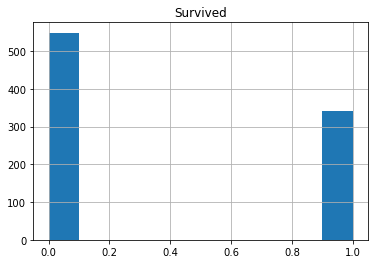

In [7]:
data[["Survived"]].hist()

The target **Survived** is slightly imbalanced.

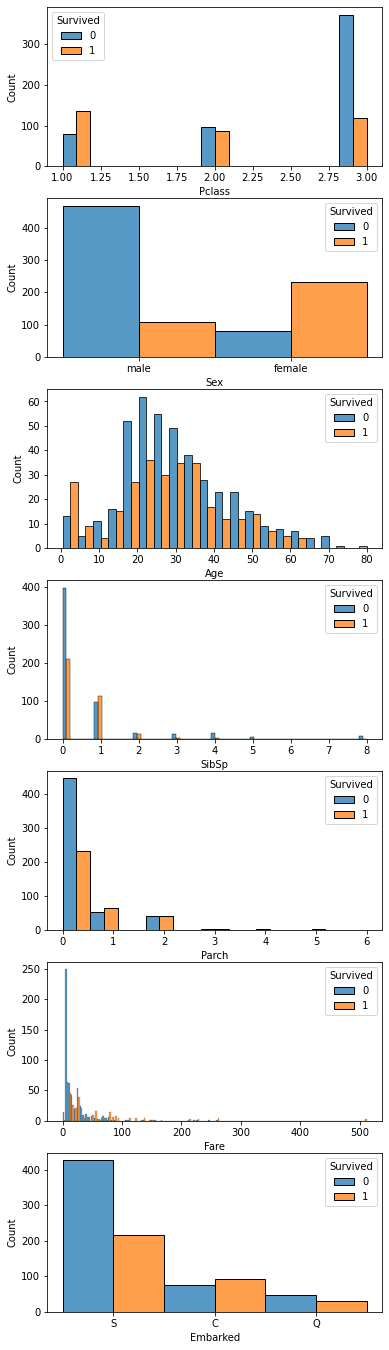

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
columns = data.columns[[2, 4, 5, 6, 7, 9, 11]]
fig, axes = plt.subplots(len(columns), figsize=(6, 24))
i = 0
for col in columns:
    sns.histplot(ax=axes[i], data=data[[col, "Survived"]].dropna(), x=col, hue="Survived", multiple="dodge")
    i +=1 

It seems that all other features show different distribution as a function of **Survived**. Therefore, those features could be considered in building ML model.

[back to top](#top)

<a id="ml"></a>
### 3. Machine Learning

In [9]:
from sklearn.model_selection import train_test_split
col = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
X_train, X_test, y_train, y_test = train_test_split(data[col], data.Survived, test_size = 0.2, random_state=0)
print(f"Train dataset: {X_train.shape[0]}\nTest dataset: {X_test.shape[0]}")

Train dataset: 712
Test dataset: 179


In [10]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Imputer
imputer = SimpleImputer(strategy="most_frequent")

# Define preprocessing for numeric columns (normalize them so they're on the same scale)
numeric_features = [2, 5]
numeric_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])

# Define preprocessing for categorical features (encode the Age column)
categorical_features = [0, 1, 3, 4, 6]
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
scv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
pipeline = Pipeline(steps=[('imputer', imputer),
                            ('preprocessor', preprocessor),
                           ('logregressor', LogisticRegressionCV(Cs=10, solver="liblinear", penalty="l1", cv=scv))])

In [11]:
model = pipeline.fit(X_train, y_train)
y_hat = model.predict(X_test)
print(f"accuracy_score: {round(accuracy_score(y_test, y_hat), 3)}")
print(f"precision: {round(precision_score(y_test, y_hat), 3)}")
print(f"recall: {round(recall_score(y_test, y_hat), 3)}")
print(f"f1 score: {round(f1_score(y_test, y_hat), 3)}")

accuracy_score: 0.816
precision: 0.773
recall: 0.739
f1 score: 0.756


Run model on the test dataset...

In [12]:
test_hat = model.predict(test[col])

In [19]:
test["Survived"] = test_hat

In [20]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prediction,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,0


In [21]:
# save predictions
test[["PassengerId", "Survived"]].to_csv("Titanic_2021-07-29.csv", index=False)

[back to top](#top)

<a id="save"></a>
### 4. Save model

In [16]:
import pickle
filename = 'Titanic.pkl'
pickle.dump(model, open(filename, 'wb'))

In [17]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

[back to top](#top)